**USING DENTAL METRICS TO PREDICT GENDER**

The goal of this project is to analyse the data and predict, based on a combination of dental features that  describes the Gender of the person


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly

In [2]:
df=pd.read_csv('/content/Dentistry Dataset.csv')

In [3]:
df.head()

Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.96                         6.28   
3                      6.08                         6.56   
4                      6.09                         6.50   

   left canine width casts  right canine index intra oral  \
0                     6.10                          0.242   
1                     6.33                          0.237   
2                     6.28                          0.248   
3                     6.56                          0.232   
4                     6.50                          0.231   

   right canine index casts  left canine index intraoral  \
0                     0.242                        0.242   
1                     0.237                        0.247   
2                     0.248                        0.264   
3                     0.232                        0.250   
4                     0.231                        0.246   

   left canine index casts  
0                    0.241  
1                    0.247  
2                    0.264  
3                    0.250  
4                    0.246

In [4]:
df.shape

(1100, 14)

In [5]:
df.columns

Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')

CHECKING IF THE DATA IS EVENLY SPREAD FOR ALL THE NUMERIC COLUMNS

<Axes: xlabel='inter canine distance intraoral', ylabel='Count'>

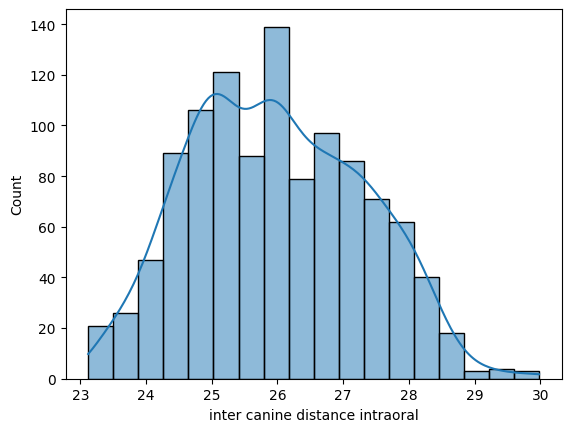

In [65]:
sns.histplot(df['inter canine distance intraoral'],kde=True)

<Axes: xlabel='intercanine distance casts', ylabel='Count'>

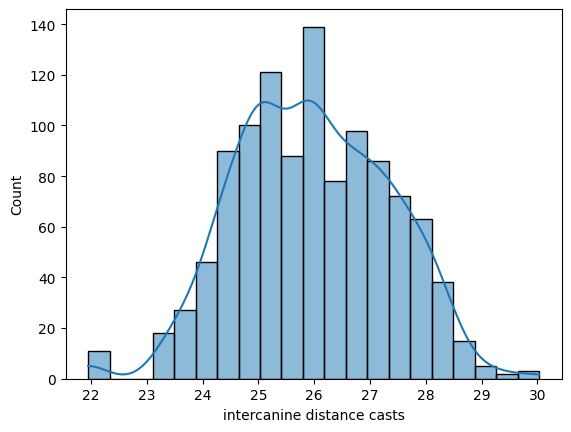

In [66]:
sns.histplot(df['intercanine distance casts'],kde=True)

<Axes: xlabel='left canine index casts', ylabel='Count'>

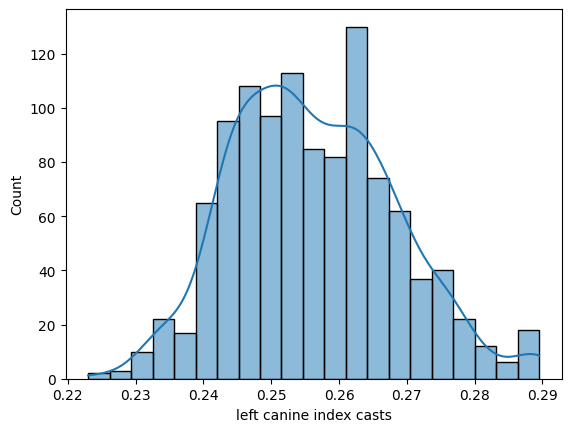

In [67]:
sns.histplot(df['left canine index casts'],kde=True)

<Axes: xlabel='left canine index intraoral', ylabel='Count'>

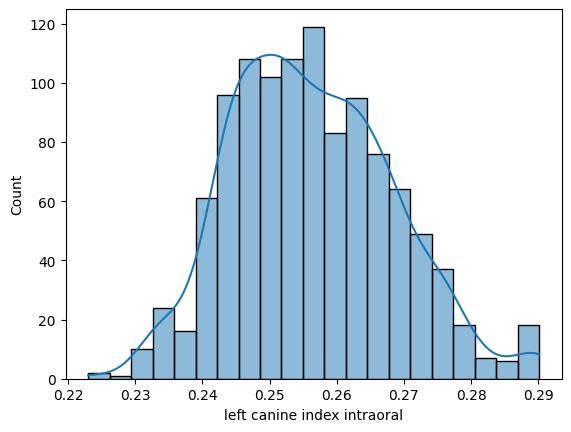

In [68]:
sns.histplot(df['left canine index intraoral'],kde=True)

<Axes: xlabel='left canine width intraoral', ylabel='Count'>

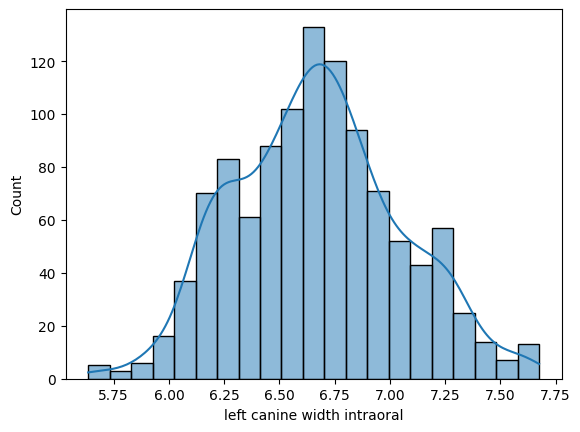

In [69]:
sns.histplot(df['left canine width intraoral'],kde=True)

<Axes: xlabel='right canine index casts', ylabel='Count'>

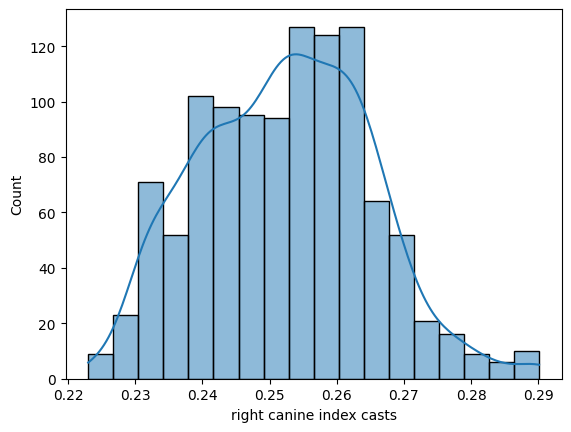

In [70]:
sns.histplot(df['right canine index casts'],kde=True)

<Axes: xlabel='right canine index intra oral', ylabel='Count'>

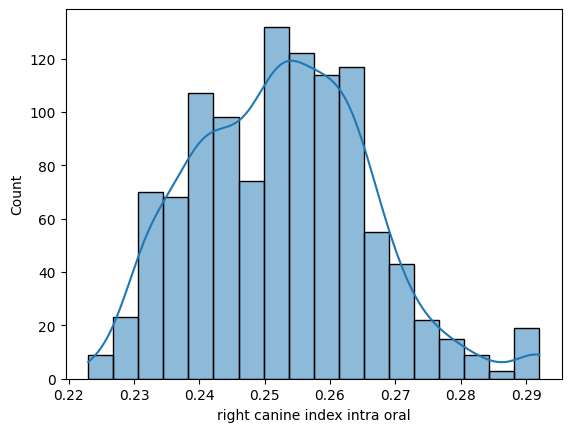

In [71]:
sns.histplot(df['right canine index intra oral'],kde=True)

<Axes: xlabel='right canine width casts', ylabel='Count'>

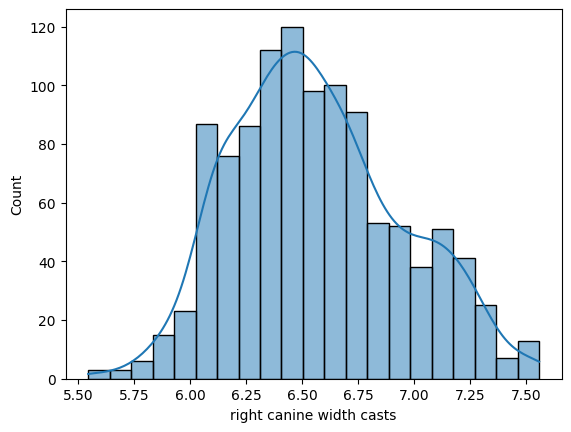

In [72]:
sns.histplot(df['right canine width casts'],kde=True)

<Axes: xlabel='right canine width intraoral', ylabel='Count'>

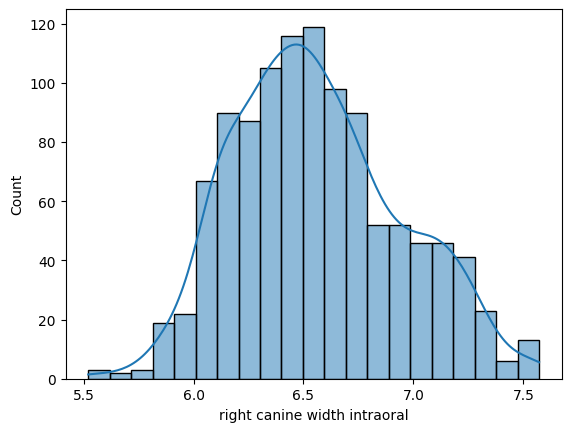

In [73]:
sns.histplot(df['right canine width intraoral'],kde=True)

In [6]:
df.dtypes

Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [7]:
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [8]:
df.drop(['Sl No', 'Sample ID' ],axis=1,inplace=True)

In [9]:
df.isnull().sum()

Age                                0
Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

DATA HAS NO NULL VALUES

In [10]:
df.describe(include='all')

Age  Gender  inter canine distance intraoral  \
count   1100.000000    1100                      1100.000000   
unique          NaN       2                              NaN   
top             NaN  Female                              NaN   
freq            NaN     550                              NaN   
mean      21.625455     NaN                        25.989009   
std        2.085892     NaN                         1.315292   
min       18.000000     NaN                        23.120000   
25%       20.000000     NaN                        25.000000   
50%       22.000000     NaN                        25.900000   
75%       23.000000     NaN                        26.992500   
max       25.000000     NaN                        30.310000   

        intercanine distance casts  right canine width intraoral  \
count                  1100.000000                   1100.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                     25.880082                      6.563000   
std                       1.862323                      0.379035   
min                       6.540000                      5.460000   
25%                      24.980000                      6.290000   
50%                      25.900000                      6.520000   
75%                      27.000000                      6.802500   
max                      30.310000                      7.610000   

        right canine width casts  left canine width intraoral  \
count                1100.000000                  1100.000000   
unique                       NaN                          NaN   
top                          NaN                          NaN   
freq                         NaN                          NaN   
mean                    6.564491                     6.669627   
std                     0.377553                     0.375841   
min                     5.460000                     5.460000   
25%                     6.300000                     6.400000   
50%                     6.520000                     6.660000   
75%                     6.802500                     6.910000   
max                     7.600000                     7.810000   

        left canine width casts  right canine index intra oral  \
count               1100.000000                    1100.000000   
unique                      NaN                            NaN   
top                         NaN                            NaN   
freq                        NaN                            NaN   
mean                   6.675018                       0.253122   
std                    0.377098                       0.015344   
min                    5.460000                       0.223000   
25%                    6.407500                       0.242000   
50%                    6.680000                       0.253000   
75%                    6.920000                       0.262000   
max                    7.810000                       0.363000   

        right canine index casts  left canine index intraoral  \
count                1100.000000                  1100.000000   
unique                       NaN                          NaN   
top                          NaN                          NaN   
freq                         NaN                          NaN   
mean                    0.252355                     0.256453   
std                     0.012892                     0.012355   
min                     0.223000                     0.223000   
25%                     0.242000                     0.247000   
50%                     0.253000                     0.255000   
75%                     0.261250                     0.264250   
max                     0.302000                     0.305000   

        left canine index casts  
count               1100.000000  
unique 

In [11]:
df.skew(numeric_only=True)

Age                               -0.095553
inter canine distance intraoral    0.201343
intercanine distance casts        -4.128636
right canine width intraoral       0.331780
right canine width casts           0.324386
left canine width intraoral        0.159732
left canine width casts            0.131558
right canine index intra oral      1.798628
right canine index casts           0.257299
left canine index intraoral        0.511304
left canine index casts            0.488348
dtype: float64

INTERCANINE DISTANCE CASTS AND RIGHT CANINE INDEX INTRA ORAL HAS SKEWED VALUES

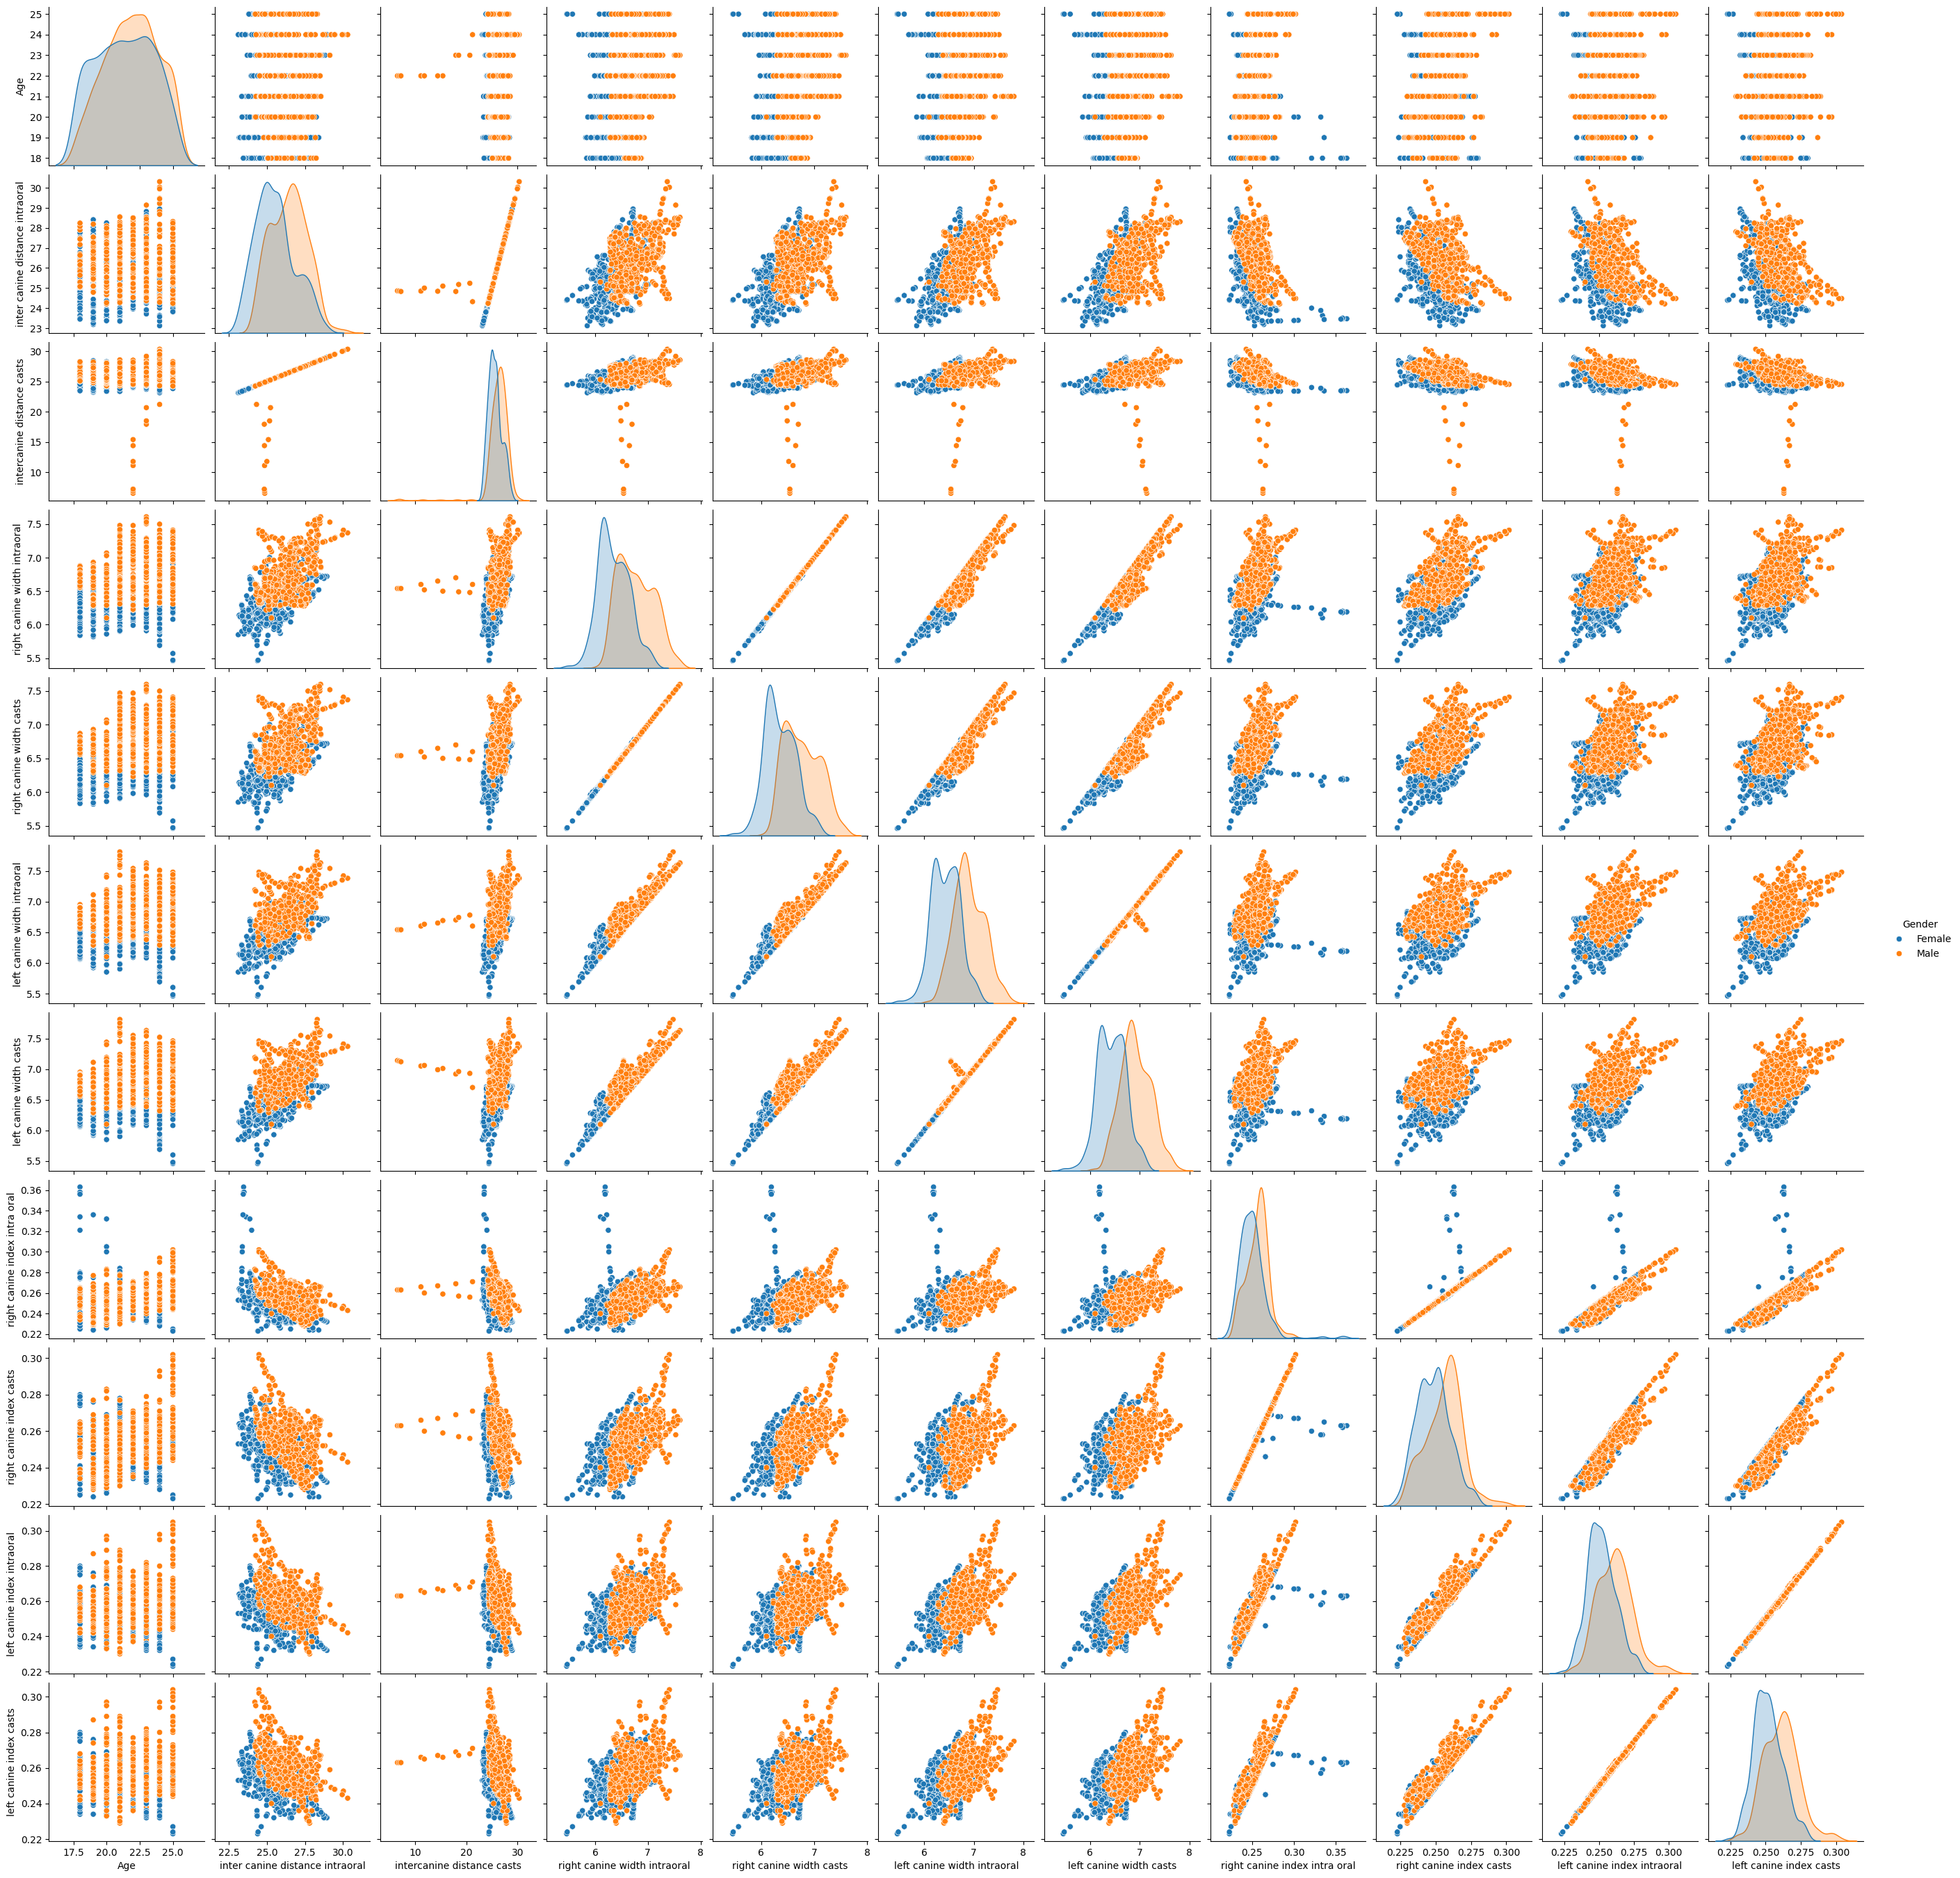

In [12]:
sns.pairplot(df,hue='Gender')

<Axes: xlabel='inter canine distance intraoral', ylabel='Gender'>

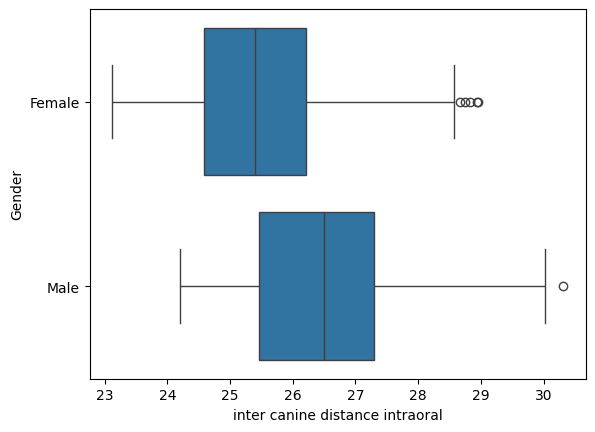

In [13]:
sns.boxplot(x=df['inter canine distance intraoral'],y=df['Gender'])

<Axes: xlabel='intercanine distance casts', ylabel='Gender'>

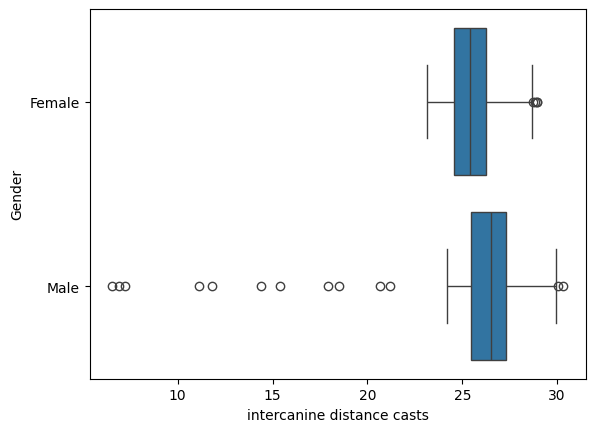

In [14]:
sns.boxplot(x=df['intercanine distance casts'],y=df['Gender'])

<Axes: xlabel='right canine width intraoral', ylabel='Gender'>

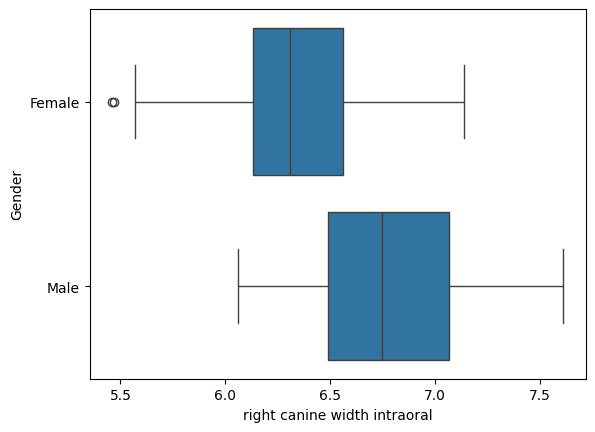

In [15]:
sns.boxplot(x=df['right canine width intraoral'],y=df['Gender'])

<Axes: xlabel='right canine width casts', ylabel='Gender'>

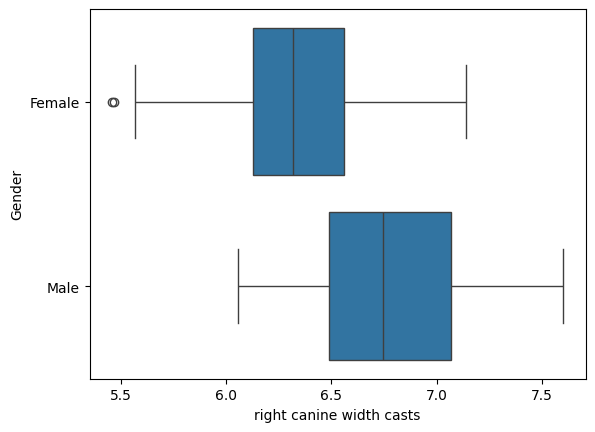

In [16]:
sns.boxplot(x=df['right canine width casts'],y=df['Gender'])

<Axes: xlabel='left canine width casts', ylabel='Gender'>

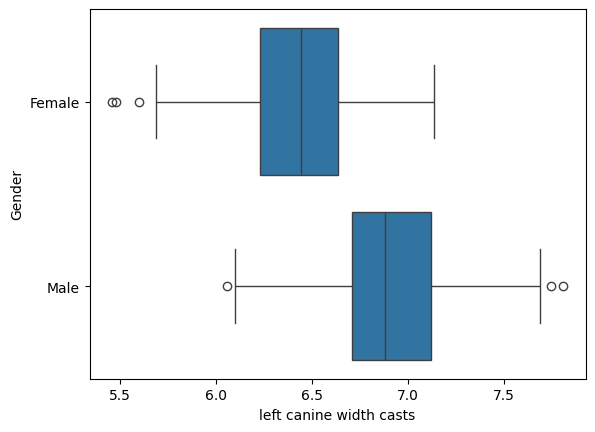

In [17]:
sns.boxplot(x=df['left canine width casts'],y=df['Gender'])

<Axes: xlabel='left canine width intraoral', ylabel='Gender'>

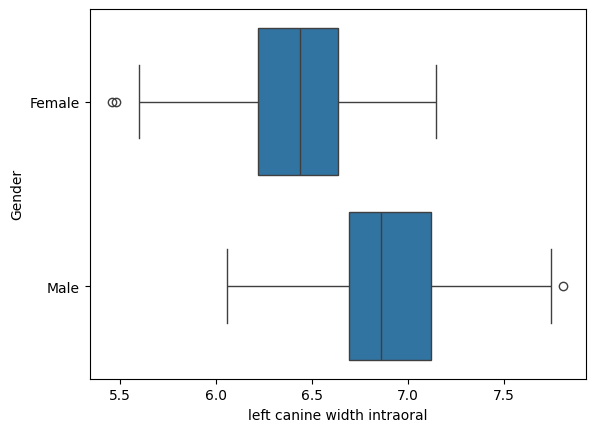

In [18]:
sns.boxplot(x=df['left canine width intraoral'],y=df['Gender'])

<Axes: xlabel='right canine index intra oral', ylabel='Gender'>

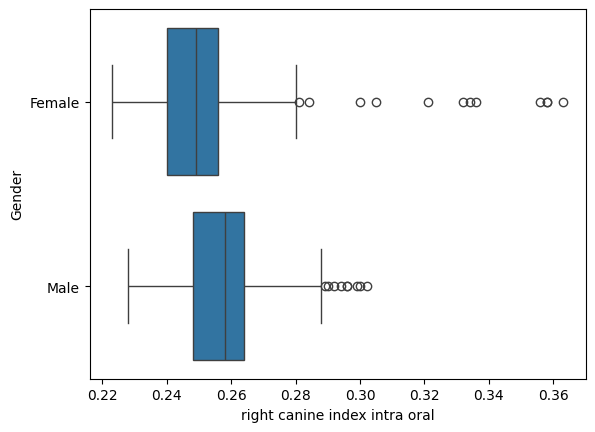

In [19]:
sns.boxplot(x=df['right canine index intra oral'],y=df['Gender'])

<Axes: xlabel='right canine index casts', ylabel='Gender'>

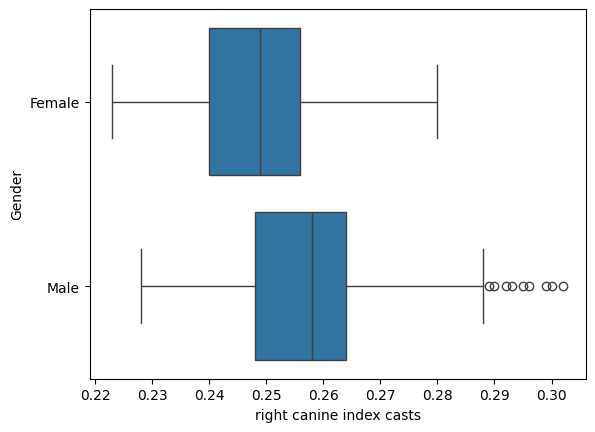

In [20]:
sns.boxplot(x=df['right canine index casts'],y=df['Gender'])

<Axes: xlabel='left canine index intraoral', ylabel='Gender'>

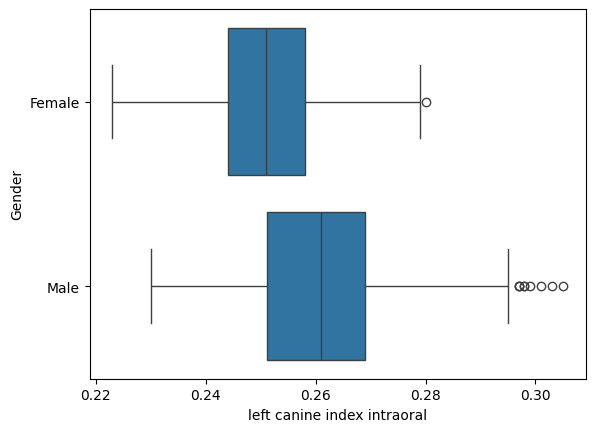

In [21]:
sns.boxplot(x=df['left canine index intraoral'],y=df['Gender'])

<Axes: xlabel='left canine index casts', ylabel='Gender'>

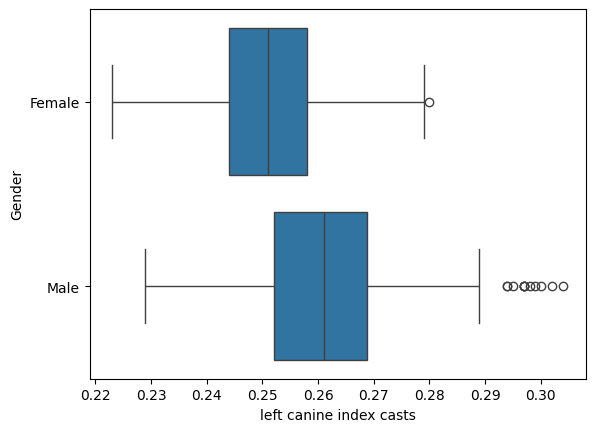

In [22]:
sns.boxplot(x=df['left canine index casts'],y=df['Gender'])

FROM THE ABOVE BOXPLOT IT CAN BE CONCLUDED THAT EVERY FEATURES HAVE OUTLIERS HENCE IT IS NECESSARY TO REMOVE THEM IN ORDER TO BUILD A ROBUST MODEL.

THEREFORE, BELOW A FUNCTION IS CREATED WHICH WOULD EXCLUDE ALL THE OUTLIER VALUES AND WILL ONLY KEEP ANYTHING THAT FALLS UNDER Q1 AND Q3

In [23]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  iqr=q3-q1
  lower_range=q1-(1.5*iqr)
  upper_range=q3+(1.5*iqr)
  return lower_range,upper_range

In [24]:
low_cancast,up_cancast=remove_outlier(df['intercanine distance casts'])
df['intercanine distance casts']=np.where(df['intercanine distance casts']<low_cancast,low_cancast,df['intercanine distance casts'])
df['intercanine distance casts']=np.where(df['intercanine distance casts']>up_cancast,up_cancast,df['intercanine distance casts'])


In [25]:
low_rightcan,up_rightcan=remove_outlier(df['right canine width intraoral'])
df['right canine width intraoral']=np.where(df['right canine width intraoral']<low_rightcan,low_rightcan,df['right canine width intraoral'])
df['right canine width intraoral']=np.where(df['right canine width intraoral']>up_rightcan,up_rightcan,df['right canine width intraoral'])

In [26]:
low_rightwidth,up_rightwidth=remove_outlier(df['right canine width casts'])
df['right canine width casts']=np.where(df['right canine width casts']<low_rightwidth,low_rightwidth,df['right canine width casts'])
df['right canine width casts']=np.where(df['right canine width casts']>up_rightwidth,up_rightwidth,df['right canine width casts'])

In [27]:
low_leftcan,up_leftcan=remove_outlier(df['left canine width intraoral'])
df['left canine width intraoral']=np.where(df['left canine width intraoral']<low_leftcan,low_leftcan,df['left canine width intraoral'])
df['left canine width intraoral']=np.where(df['left canine width intraoral']>up_leftcan,up_leftcan,df['left canine width intraoral'])

In [28]:
low_leftwidth,up_leftwidth=remove_outlier(df['left canine width casts'])
df['left canine width casts']=np.where(df['left canine width casts']<low_leftwidth,low_leftwidth,df['left canine width casts'])
df['left canine width casts']=np.where(df['left canine width casts']>up_leftwidth,up_leftwidth,df['left canine width casts'])

In [29]:
low_index,up_index=remove_outlier(df['right canine index intra oral'])
df['right canine index intra oral']=np.where(df['right canine index intra oral']<low_index,low_index,df['right canine index intra oral'])
df['right canine index intra oral']=np.where(df['right canine index intra oral']>up_index,up_index,df['right canine index intra oral'])

In [30]:
low_ic,up_ic=remove_outlier(df['right canine index casts'])
df['right canine index casts']=np.where(df['right canine index casts']<low_ic,low_ic,df['right canine index casts'])
df['right canine index casts']=np.where(df['right canine index casts']>up_ic,up_ic,df['right canine index casts'])

In [31]:
low_lindex,up_lindex=remove_outlier(df['left canine index intraoral'])
df['left canine index intraoral']=np.where(df['left canine index intraoral']<low_lindex,low_lindex,df['left canine index intraoral'])
df['left canine index intraoral']=np.where(df['left canine index intraoral']>up_lindex,up_lindex,df['left canine index intraoral'])

In [32]:
low_lic,up_lic=remove_outlier(df['left canine index casts'])
df['left canine index casts']=np.where(df['left canine index casts']<low_lic,low_lic,df['left canine index casts'])
df['left canine index casts']=np.where(df['left canine index casts']>up_lic,up_lic,df['left canine index casts'])

In [33]:
low_io,up_io=remove_outlier(df['inter canine distance intraoral'])
df['inter canine distance intraoral']=np.where(df['inter canine distance intraoral']<low_io,low_io,df['inter canine distance intraoral'])
df['inter canine distance intraoral']=np.where(df['inter canine distance intraoral']>up_io,up_io,df['inter canine distance intraoral'])

<Axes: xlabel='inter canine distance intraoral'>

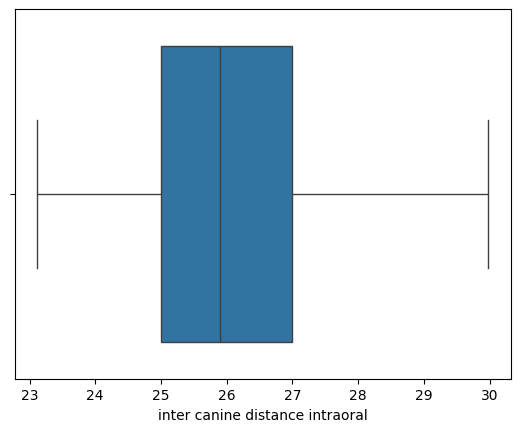

In [34]:
sns.boxplot(x=df['inter canine distance intraoral'])

<Axes: xlabel='intercanine distance casts'>

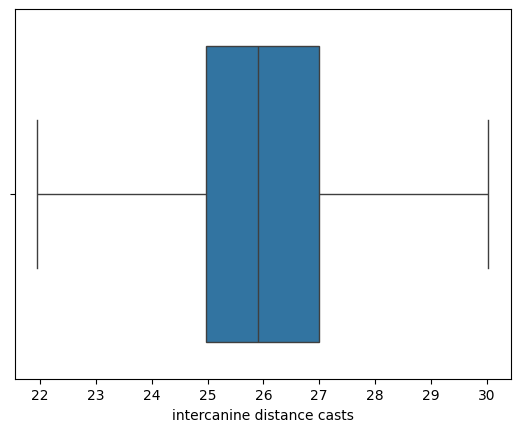

In [35]:
sns.boxplot(x=df['intercanine distance casts'])

<Axes: ylabel='intercanine distance casts'>

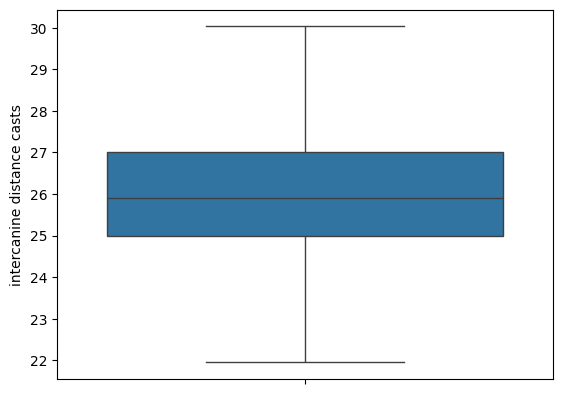

In [36]:
sns.boxplot(df['intercanine distance casts'])

<Axes: ylabel='right canine width intraoral'>

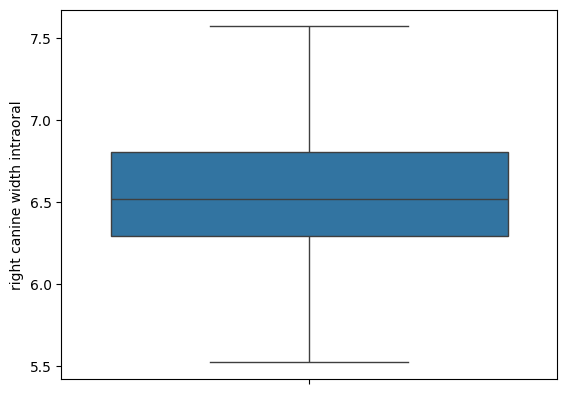

In [37]:
sns.boxplot(df['right canine width intraoral'])

<Axes: ylabel='right canine width casts'>

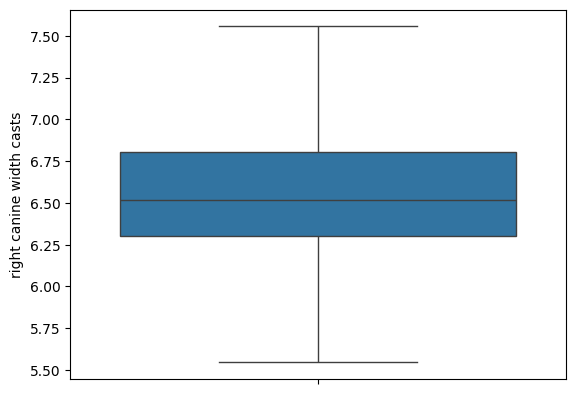

In [38]:
sns.boxplot(df['right canine width casts'])

<Axes: ylabel='left canine width intraoral'>

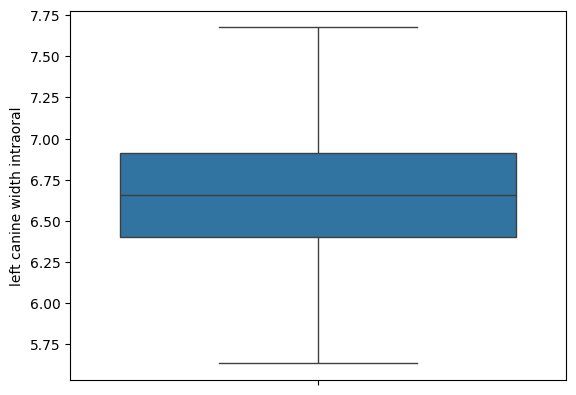

In [39]:
sns.boxplot(df['left canine width intraoral'])

<Axes: ylabel='left canine width casts'>

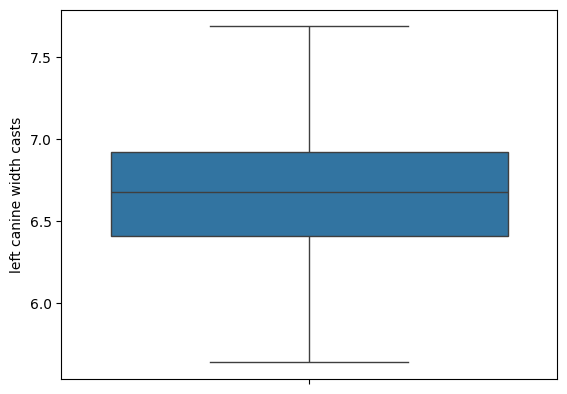

In [40]:
sns.boxplot(df['left canine width casts'])

<Axes: ylabel='right canine index intra oral'>

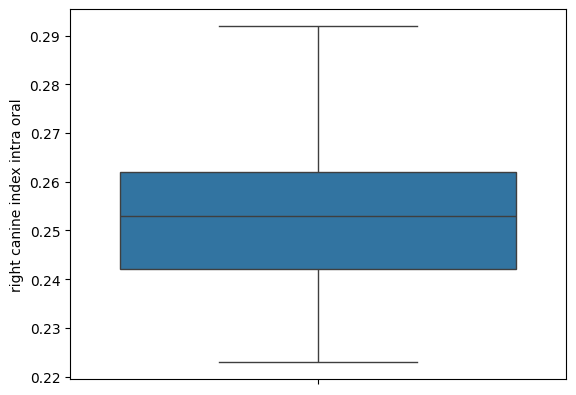

In [41]:
sns.boxplot(df['right canine index intra oral'])

<Axes: ylabel='right canine index casts'>

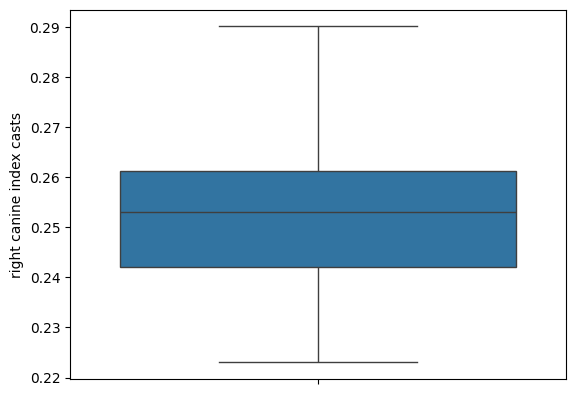

In [42]:
sns.boxplot(df['right canine index casts'])

<Axes: ylabel='left canine index intraoral'>

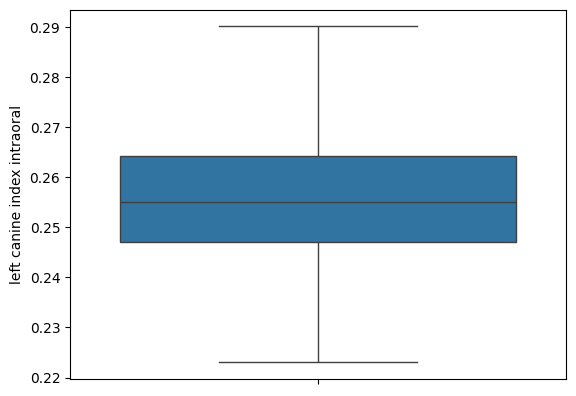

In [43]:
sns.boxplot(df['left canine index intraoral'])

<Axes: ylabel='left canine index casts'>

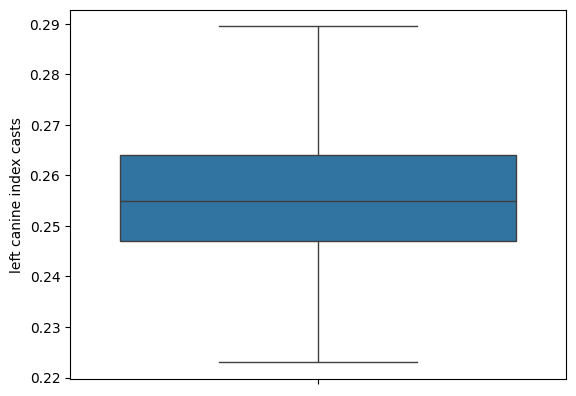

In [44]:
sns.boxplot(df['left canine index casts'])

FROM THE ABOVE BOXPLOTS IT CAN BE CONCLUDED THAT ALL THE OUTLIERS ARE NOW REMOVED

CHECKING IF THE TARGET VARIABLE IS EQUALLY DISTRIBUTED OR NOT

In [45]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

<ipython-input-45-7e3c10e02839>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female':0,'Male':1})


In [46]:
df['Gender'].value_counts()

Gender
0    550
1    550
Name: count, dtype: int64

TARGET VARIABLE IS EVENLY SPREAD ACROSS THE DATA

In [47]:
correlation_matrix=df.corr()
correlation_matrix

Age    Gender  \
Age                              1.000000  0.129936   
Gender                           0.129936  1.000000   
inter canine distance intraoral  0.071061  0.340513   
intercanine distance casts       0.059276  0.304955   
right canine width intraoral     0.244158  0.558233   
right canine width casts         0.241913  0.558445   
left canine width intraoral      0.164388  0.627545   
left canine width casts          0.169969  0.637360   
right canine index intra oral    0.159405  0.261061   
right canine index casts         0.195978  0.295054   
left canine index intraoral      0.108139  0.380663   
left canine index casts          0.105599  0.383514   

                                 inter canine distance intraoral  \
Age                                                     0.071061   
Gender                                                  0.340513   
inter canine distance intraoral                         1.000000   
intercanine distance casts                              0.976717   
right canine width intraoral                            0.564698   
right canine width casts                                0.566577   
left canine width intraoral                             0.601913   
left canine width casts                                 0.590547   
right canine index intra oral                          -0.380647   
right canine index casts                               -0.353259   
left canine index intraoral                            -0.343856   
left canine index casts                                -0.338016   

                                 intercanine distance casts  \
Age                                                0.059276   
Gender                                             0.304955   
inter canine distance intraoral                    0.976717   
intercanine distance casts                         1.000000   
right canine width intraoral                       0.542883   
right canine width casts                           0.544760   
left canine width intraoral                        0.580369   
left canine width casts                            0.548861   
right canine index intra oral                     -0.380422   
right canine index casts                          -0.355494   
left canine index intraoral                       -0.345686   
left canine index casts                           -0.340225   

                                 right canine width intraoral  \
Age                                                  0.244158   
Gender                                               0.558233   
inter canine distance intraoral                      0.564698   
intercanine distance casts                           0.542883   
right canine width intraoral                         1.000000   
right canine width casts                             0.999827   
left canine width intraoral                          0.942010   
left canine width casts                              0.937029   
right canine index intra oral                        0.523049   
right canine index casts                             0.569578   
left canine index intraoral                          0.505260   
left canine index casts                              0.509557   

                                 right canine width casts  \
Age                                              0.241913   
Gender                                           0.558445   
inter canine distance intraoral                  0.566577   
intercanine distance casts                       0.544760   
right canine width intraoral                     0.999827   
right canine width casts                         1.000000   
left canine width intraoral                      0.943145   
left canine width casts                          0.938057   
right canine index intra oral                    0.521005   
right canine index casts                         0.567769   
left canine index intraoral                      0.504526   
left canine index casts                

LOOKING AT THE ABOVE CORRELATION MATRIX DATA, FEW CONCLUSION CAN BE MADE THAT A LOT OF FEATURES ARE CORRELATED, MAINLY- intercanine distance casts and intercanine distance intraoral, right canine width casts and right canine index intraoral, left canine width casts and left canine index intraoral

<Axes: >

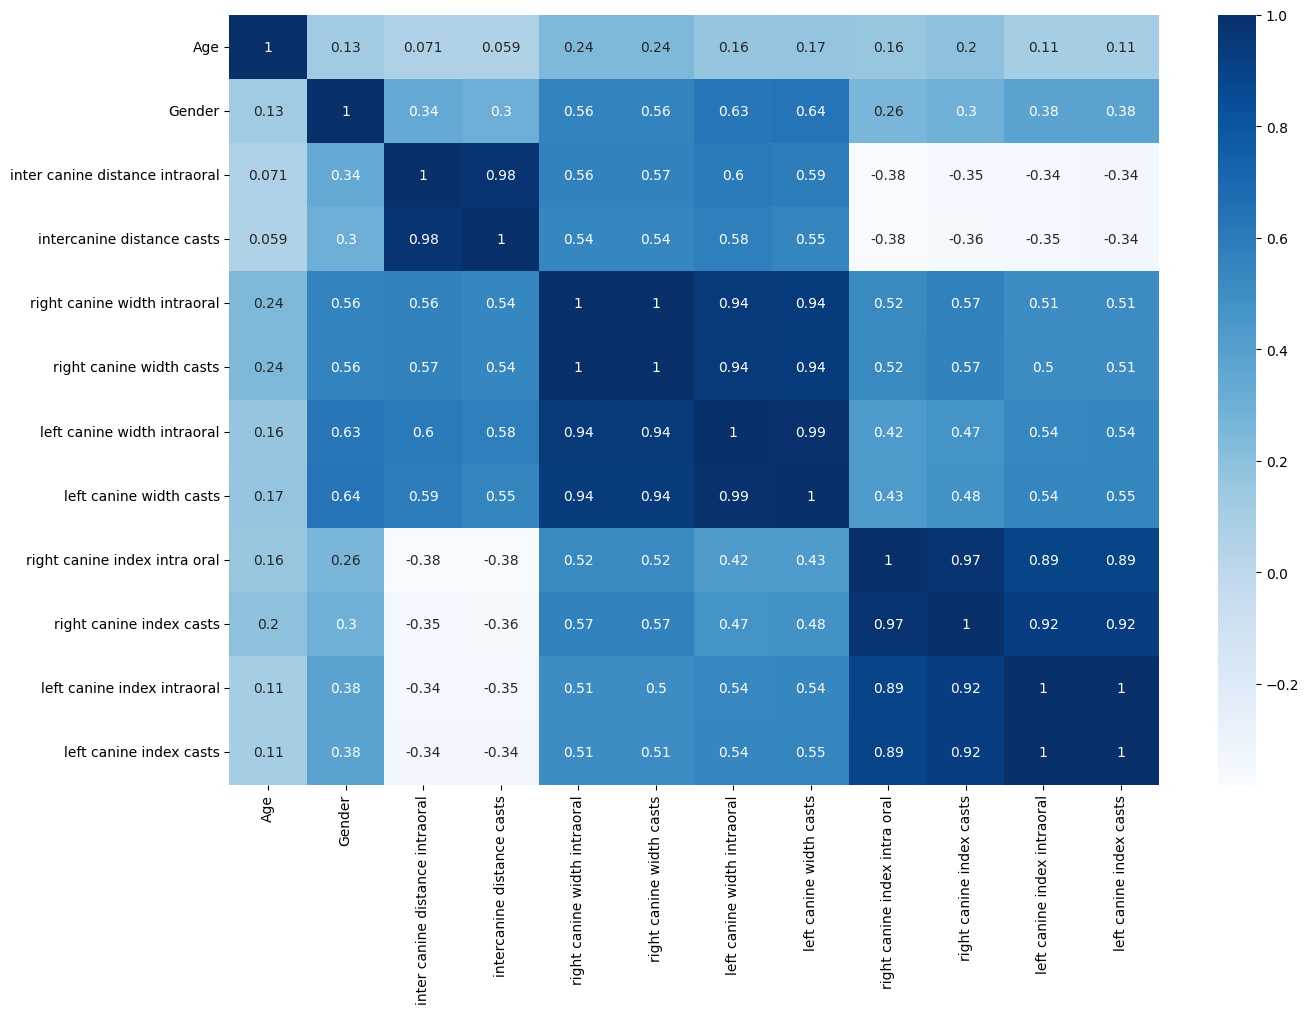

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')

In [49]:
x=df.drop(['Gender'],axis=1)
y=df['Gender']

dropping the target variable from feature variable

Using normalization technique below so that the target variables are evenly scaled between 0 and 1- This eliminates the problem of overfitting or the model to be biased.

In [50]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       136
           1       0.85      0.76      0.80       139

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275

Accuracy score for Logistic Regression
0.8072727272727273
Confusion matrix for Logistic Regression is 


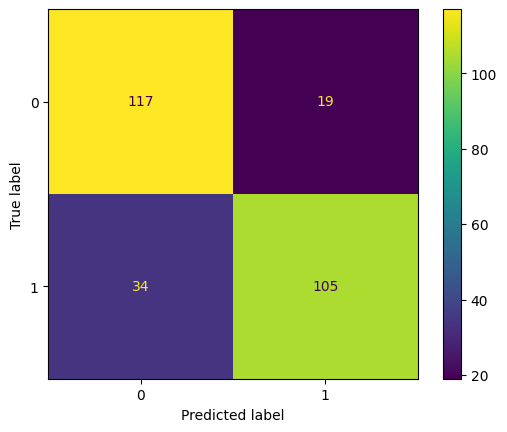

In [53]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred=model_log.predict(x_test)
conf_matrix= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
print(f'Classification Report for Logistic Regression\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for Logistic Regression\n{accuracy_score(y_test,y_pred)}')
print(f'Confusion matrix for Logistic Regression is \n {conf_matrix.plot()} ')


The roc_auc score for Logistic Regression is 0.8078449005501481


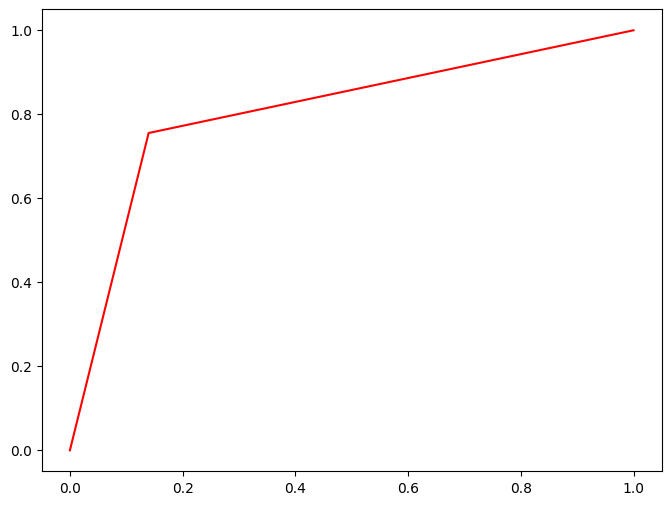

In [54]:
auc_score=roc_auc_score(y_test,y_pred)
print(f'The roc_auc score for Logistic Regression is {auc_score}')
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',label='Logistic Regression(AUC={auc_score:.2f})')

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       136
           1       0.89      0.91      0.90       139

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275

Accuracy score for Decision Tree Classifier
0.8981818181818182
Confusion matrix for Decision Tree Classifier is 


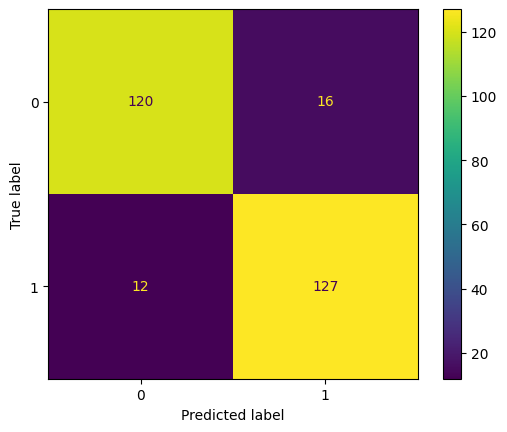

In [55]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
conf_matrix= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
print(f'Classification Report for Decision Tree Classifier\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for Decision Tree Classifier\n{accuracy_score(y_test,y_pred)}')
print(f'Confusion matrix for Decision Tree Classifier is \n {conf_matrix.plot()}')

The roc_auc score for Decision Tree Classification is 0.898011002962336


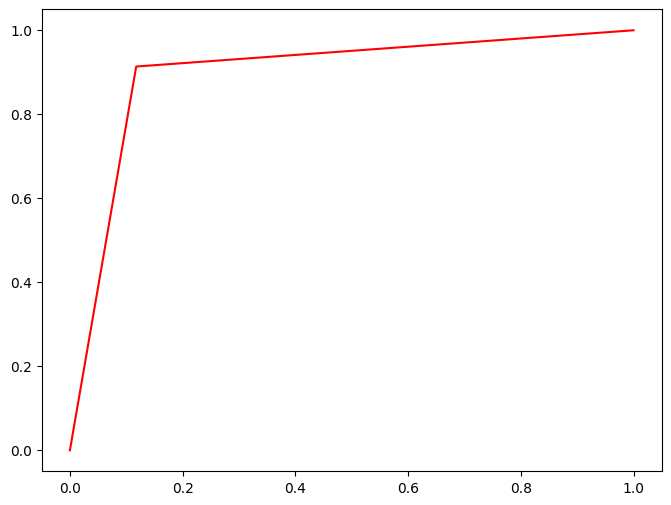

In [56]:
auc_score=roc_auc_score(y_test,y_pred)
print(f'The roc_auc score for Decision Tree Classification is {auc_score}')
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',label=' Decision Tree Classification (AUC={auc_score:.2f})')

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       136
           1       0.91      0.89      0.90       139

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275

Accuracy score for Random Forest Classifier
0.9018181818181819
Confusion matrix for Random Forest Classifier is 


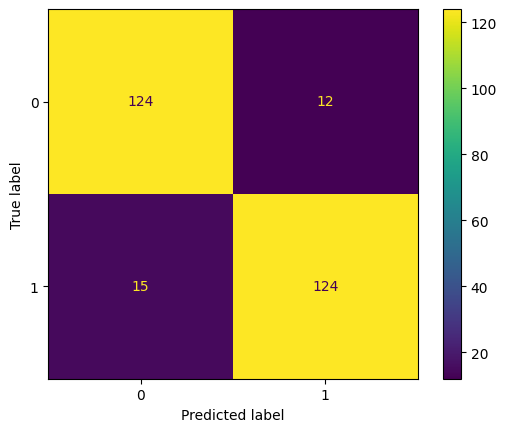

In [57]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
conf_matrix= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
print(f'Classification Report for Random Forest Classifier\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for Random Forest Classifier\n{accuracy_score(y_test,y_pred)}')
print(f'Confusion matrix for Random Forest Classifier is \n {conf_matrix.plot()}')

The roc_auc score for Random Forest Classification is 0.9019255184088023


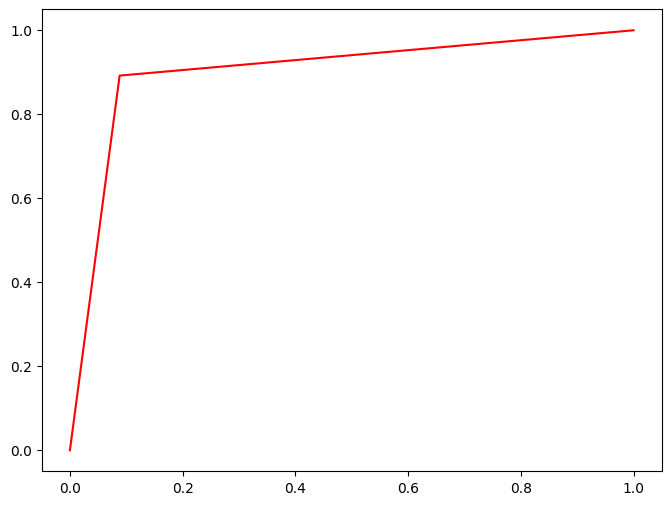

In [58]:
auc_score=roc_auc_score(y_test,y_pred)
print(f'The roc_auc score for Random Forest Classification is {auc_score}')
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',label=' Random Forest Classification (AUC={auc_score:.2f})')

Classification Report for XGBoost Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       136
           1       0.93      0.92      0.93       139

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275

Accuracy score for XGBoost Classifier
0.9272727272727272
Confusion matrix for XGBoost Classifier is 


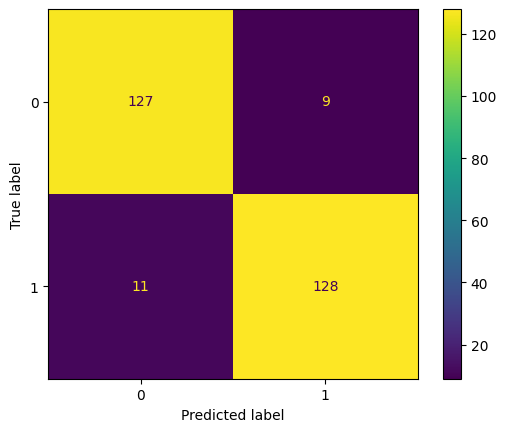

In [59]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
y_pred=XGB.predict(x_test)
conf_matrix= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
print(f'Classification Report for XGBoost Classifier\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for XGBoost Classifier\n{accuracy_score(y_test,y_pred)}')
print(f'Confusion matrix for XGBoost Classifier is \n {conf_matrix.plot()}')

Looking at the above 4 models, it can be concluded that XGBoost is best suited for the Dentistry model as it has the highest accuracy score of 92% and has the least amount of False Positive and False Negative values from the confusion matrix table

The roc_auc score for XGBoost Classification is 0.9273434193821414


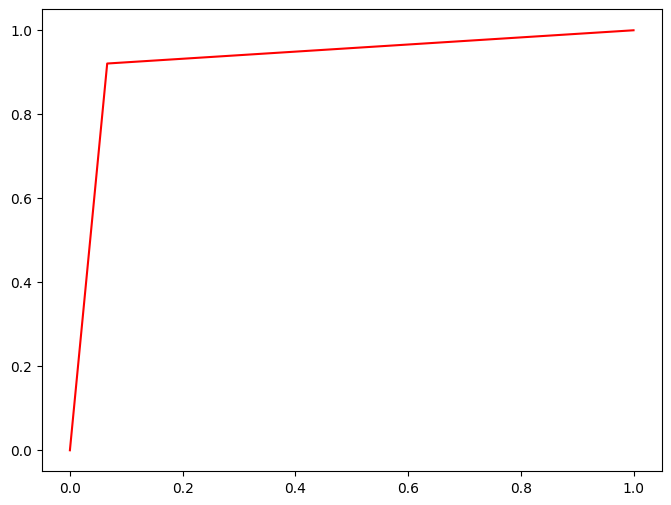

In [60]:
auc_score=roc_auc_score(y_test,y_pred)
print(f'The roc_auc score for XGBoost Classification is {auc_score}')
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',label=' XGBoost Classification (AUC={auc_score:.2f})')

Hyper Tuning Parameters

In [61]:
model_log1=LogisticRegression(C=1.0,class_weight=None,dual=False,penalty='l2',solver='liblinear',max_iter=50)
model_log1.fit(x_train,y_train)
y_pred=model_log1.predict(x_test)
print(f'Classification Report for Logistic Regression\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for Logistic Regression\n{accuracy_score(y_test,y_pred)}')

DT1=DecisionTreeClassifier(criterion='gini',max_depth=100, max_leaf_nodes=10,splitter='best',min_samples_leaf=1,min_samples_split=2,random_state=30)
DT1.fit(x_train,y_train)
y_pred=DT1.predict(x_test)
print(f'Classification Report for Decision Tree Classifier\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for Decision Tree Classifier\n{accuracy_score(y_test,y_pred)}')



Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       136
           1       0.85      0.76      0.80       139

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275

Accuracy score for Logistic Regression
0.8072727272727273
Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       136
           1       0.83      0.82      0.82       139

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275

Accuracy score for Decision Tree Classifier
0.8218181818181818


In [62]:
RF1=RandomForestClassifier(n_estimators=1000,n_jobs=1000,max_depth=70,bootstrap=True)
RF1.fit(x_train,y_train)
y_pred=RF1.predict(x_test)

print(f'Classification Report for Random Forest Classifier\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for Random Forest Classifier\n{accuracy_score(y_test,y_pred)}')


Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       136
           1       0.91      0.91      0.91       139

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275

Accuracy score for Random Forest Classifier
0.9090909090909091


In [63]:
XGB1=XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=4,min_child_weight=6,gamma=0,reg_alpha=0.005,nthread=2,seed=27,eval_metric='logloss')
XGB1.fit(x_train,y_train)
y_pred=XGB1.predict(x_test)
print(f'Classification Report for XGBoost Classifier\n{classification_report(y_test,y_pred)}')
print(f'Accuracy score for XGBoost Classifier\n{accuracy_score(y_test,y_pred)}')


Classification Report for XGBoost Classifier
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       136
           1       0.93      0.86      0.90       139

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275

Accuracy score for XGBoost Classifier
0.8981818181818182


After tuning the parameters of all the 4 models the score did not improve, hence we will stick to the original model used before hypertuning the model and will go with XGBoost Classifier to predict the values of male and female for the dentistry dataset.